In [1]:
from module_imports import *
from download_data import *
from import_data import *
from larochelle_nn import *

%matplotlib inline

stock_df, prediction_df = pd.DataFrame(), pd.DataFrame()
pred_tickers = []
source = "G"
binarize = True
gt = 0
lt = 10.0
vol = 0
if source == "Q":
    stock_df, prediction_df, pred_tickers = get_quandl_data(binarize=True, gt=gt, lt=lt, vol=vol)
elif source == "G":
    stock_df, prediction_df, pred_tickers = get_goog_data(binarize=True, gt=gt, lt=lt, vol=vol)
    
Y = stock_df['label'].values
Y = Y.reshape(Y.shape[0], 1)

X_df = stock_df.drop('label', axis=1)
X = X_df.values

print X.shape, Y.shape
X_df.tail()

(1171, 86) (1171, 1)


,10.0-CLOSE,10.0-HIGH,10.0-LOW,10.0-OPEN,10.0-VOLUME,10.0-op_cl%,10.0-lo_hi%,10.3-CLOSE,10.3-HIGH,10.3-LOW,...,15.0-lo_hi%,15.3-CLOSE,15.3-HIGH,15.3-LOW,15.3-OPEN,15.3-VOLUME,15.3-op_cl%,15.3-lo_hi%,ticker,week_day
0,7.0900,7.6000,7.0505,7.600,9525,-0.067105,0.077938,7.018,7.1100,6.9501,...,0.005755,6.91,6.950,6.9000,6.94,7828,-0.004323,0.007246,76,2
0,6.7900,6.9600,6.7800,6.960,10002,-0.024425,0.026549,6.681,6.8300,6.6000,...,0.008156,6.62,6.690,6.5600,6.58,13700,0.006079,0.019817,76,3
0,6.6500,6.6800,6.4600,6.680,15827,-0.004491,0.034056,6.730,6.9396,6.7001,...,0.039802,6.55,6.576,6.5500,6.57,5300,-0.003044,0.003969,76,4
0,5.8884,6.3120,5.6300,6.312,73120,-0.067110,0.121137,6.300,6.3000,5.8600,...,0.019640,6.26,6.275,6.2186,6.23,11000,0.004815,0.009070,76,0
0,6.2700,6.4185,6.2236,6.400,15617,-0.020313,0.031316,6.210,6.2700,6.2000,...,0.009479,6.29,6.410,6.2700,6.41,3500,-0.018721,0.022329,76,1


In [2]:
skb = SelectKBest(k=5)
skb = skb.fit(X,Y.ravel())
for i in xrange(X_df.columns.shape[0]):
    if skb.scores_[i] > 1.0:
        print X_df.columns[i], skb.scores_[i]
        
X = skb.transform(X)

10.0-VOLUME 24.9162102623
10.0-lo_hi% 2.56053900503
10.3-VOLUME 20.3925498401
10.3-lo_hi% 3.91202026297
11.0-VOLUME 21.9983645053
11.0-op_cl% 3.0638695916
11.0-lo_hi% 9.9266116519
11.3-VOLUME 21.4783313166
11.3-lo_hi% 4.44838883245
12.0-VOLUME 22.2114664733
12.0-op_cl% 6.88517350636
12.0-lo_hi% 4.65463125159
12.3-VOLUME 33.6161436687
12.3-lo_hi% 17.5424812113
13.0-VOLUME 30.8420670966
13.0-op_cl% 5.28898278845
13.0-lo_hi% 13.0560197584
13.3-VOLUME 24.4650387527
13.3-lo_hi% 8.06588720596
14.0-VOLUME 22.2380020095
14.0-lo_hi% 2.89876337689
14.3-VOLUME 28.5399066471
14.3-lo_hi% 4.59682677706
15.0-VOLUME 22.9243082361
15.0-op_cl% 1.0770410291
15.0-lo_hi% 5.18043397089
15.3-VOLUME 33.8622827781
15.3-lo_hi% 13.7088744098
ticker 1.5173116775


In [3]:
balance_labeled_data = False
if balance_labeled_data == True:
    # randomly balance labeled data
    indices_Y_is_0 = np.where(Y == 0)[0]
    print indices_Y_is_0.shape[0]
    indices_Y_is_1 = np.where(Y == 1)[0]
    print indices_Y_is_1.shape[0]

    subset_indices_Y_is_0 = np.random.choice(indices_Y_is_0, indices_Y_is_1.shape[0])
    X_is_0 = X[subset_indices_Y_is_0]
    Y_is_0 = Y[subset_indices_Y_is_0]
    X_is_1 = X[indices_Y_is_1]
    Y_is_1 = Y[indices_Y_is_1]

    X = np.concatenate((X_is_0,X_is_1))
    Y = np.concatenate((Y_is_0,Y_is_1))

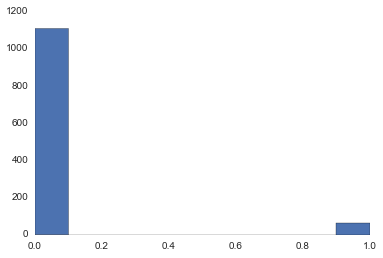

In [4]:
plt.hist(Y)
plt.show()

In [5]:
vectorize_label = True
if vectorize_label == True:
    new_y = []
    positives = []
    for i in xrange(Y.shape[0]):
        if Y[i] == 0:
            new_y.append(np.array([[1],[0]]))
        elif Y[i] == 1:
            new_y.append(np.array([[0],[1]]))
    Y = new_y

In [6]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.30, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.50, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
#for x,y in zip(X_train, y_train):
#    print x.reshape(x.shape[0],1)
#    print y.reshape(y.shape[0],1)
#    break

---

In [9]:
hs = [1, 2, 5, 10, 15, 50, 100]

epochs = 100
Lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
Regs = ['L2', 'L1']
alphas = [0.0001, 0.001, 0.01, 0.1]

# GRID SEARCH
#for h in hs:
#    for Lambda in Lambdas:
#        for Reg in Regs:
#            for alpha in alphas:
#                NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, Lambda, Reg, alpha, plot=False)

# RANDOM SEARCH
for i in xrange(10):
    h = np.random.choice(hs)
    NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, np.random.choice(Lambdas), np.random.choice(Regs), np.random.choice(alphas), plot=False)

---

In [10]:
### COMBINE GOOG AND QUANDL -> get yesterday's data and today's data (inlcuding roll avg)